## N/LAB: Machine Learning and Advanced Analytics
![alt text](https://drive.google.com/uc?export=download&id=1hFzxPx2HHxtArNzXzYC0DTIgJ5rbN74Z)

# Practical: sklearn preprocessing framework
## Demo, plus Task 1/2

**Task:** You are a food wholesaler who keeps records of sales to your clients.

Predict the annual spending on fresh products.

Prediction set (not provided): Current clients who do purchase goods from you but who are not currently purchasing fresh products.  

**Business aim:** to be able to predict potential profit from trying to sell fresh products to these clients.

**Input features:**
Channel	(categorical)
Region (categorical)
Milk (continuous)
Grocery (continuous)
Frozen (continuous)
Detergents_Paper (continuous)
Delicassen (continuous)

**Output feature:**
Fresh (continuous)

Data set: Modified version from https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Data set to use: https://drive.google.com/uc?export=download&id=12TlH95eGjgndgbNSil8lpc_hpVvcbJyk




**In implementing our solution we have decided:**


1.   to use linear regression (probably the wrong choice in reality)
2.   to only care about prediction (not model interpretation)

**Based on this we understand that:**

1.   We can only have continuous valued inputs
2.   We cannot have any missing values

**Step 0:** Imports

In [1]:
import pandas as pd

**Step 1:** Let's load the data, check basic data types are inline with the documentation and decide what to do with our features.






In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=12TlH95eGjgndgbNSil8lpc_hpVvcbJyk')

In [3]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656.0,7561.0,214,2674.0,1338.0
1,Retail,Other,7057,9810.0,9568.0,1762,3293.0,1776.0
2,Retail,Other,6353,8808.0,7684.0,2405,3516.0,7844.0
3,Restaurant,Other,13265,1196.0,4221.0,6404,507.0,1788.0
4,Retail,Other,22615,5410.0,7198.0,3915,1777.0,5185.0
5,Retail,Other,9413,8259.0,5126.0,666,1795.0,1451.0
6,Retail,Other,12126,3199.0,6975.0,480,3140.0,545.0
7,Retail,Other,7579,4956.0,9426.0,1669,3321.0,2566.0
8,Restaurant,Other,5963,3648.0,6192.0,425,1716.0,750.0
9,Retail,Other,6006,11093.0,18881.0,1159,7425.0,2098.0


In [4]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,436.000000,436.000000,440.000000,437.000000,439.000000
mean,12002.922727,5818.032110,7931.717890,3071.931818,2898.945080,1526.678815
std,12646.445566,7401.499307,9528.176983,4854.673333,4779.547495,2823.067988
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1555.750000,2153.000000,742.250000,256.000000,407.500000
50%,8504.000000,3641.000000,4751.000000,1526.000000,821.000000,967.000000
75%,16933.750000,7190.250000,10550.000000,3554.250000,3961.000000,1821.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Step 2:** Check for missing data. Decide what to do.

In [5]:
df.isnull().sum(axis=0)

Channel             2
Region              1
Fresh               0
Milk                4
Grocery             4
Frozen              0
Detergents_Paper    3
Delicassen          1
dtype: int64

<Axes: >

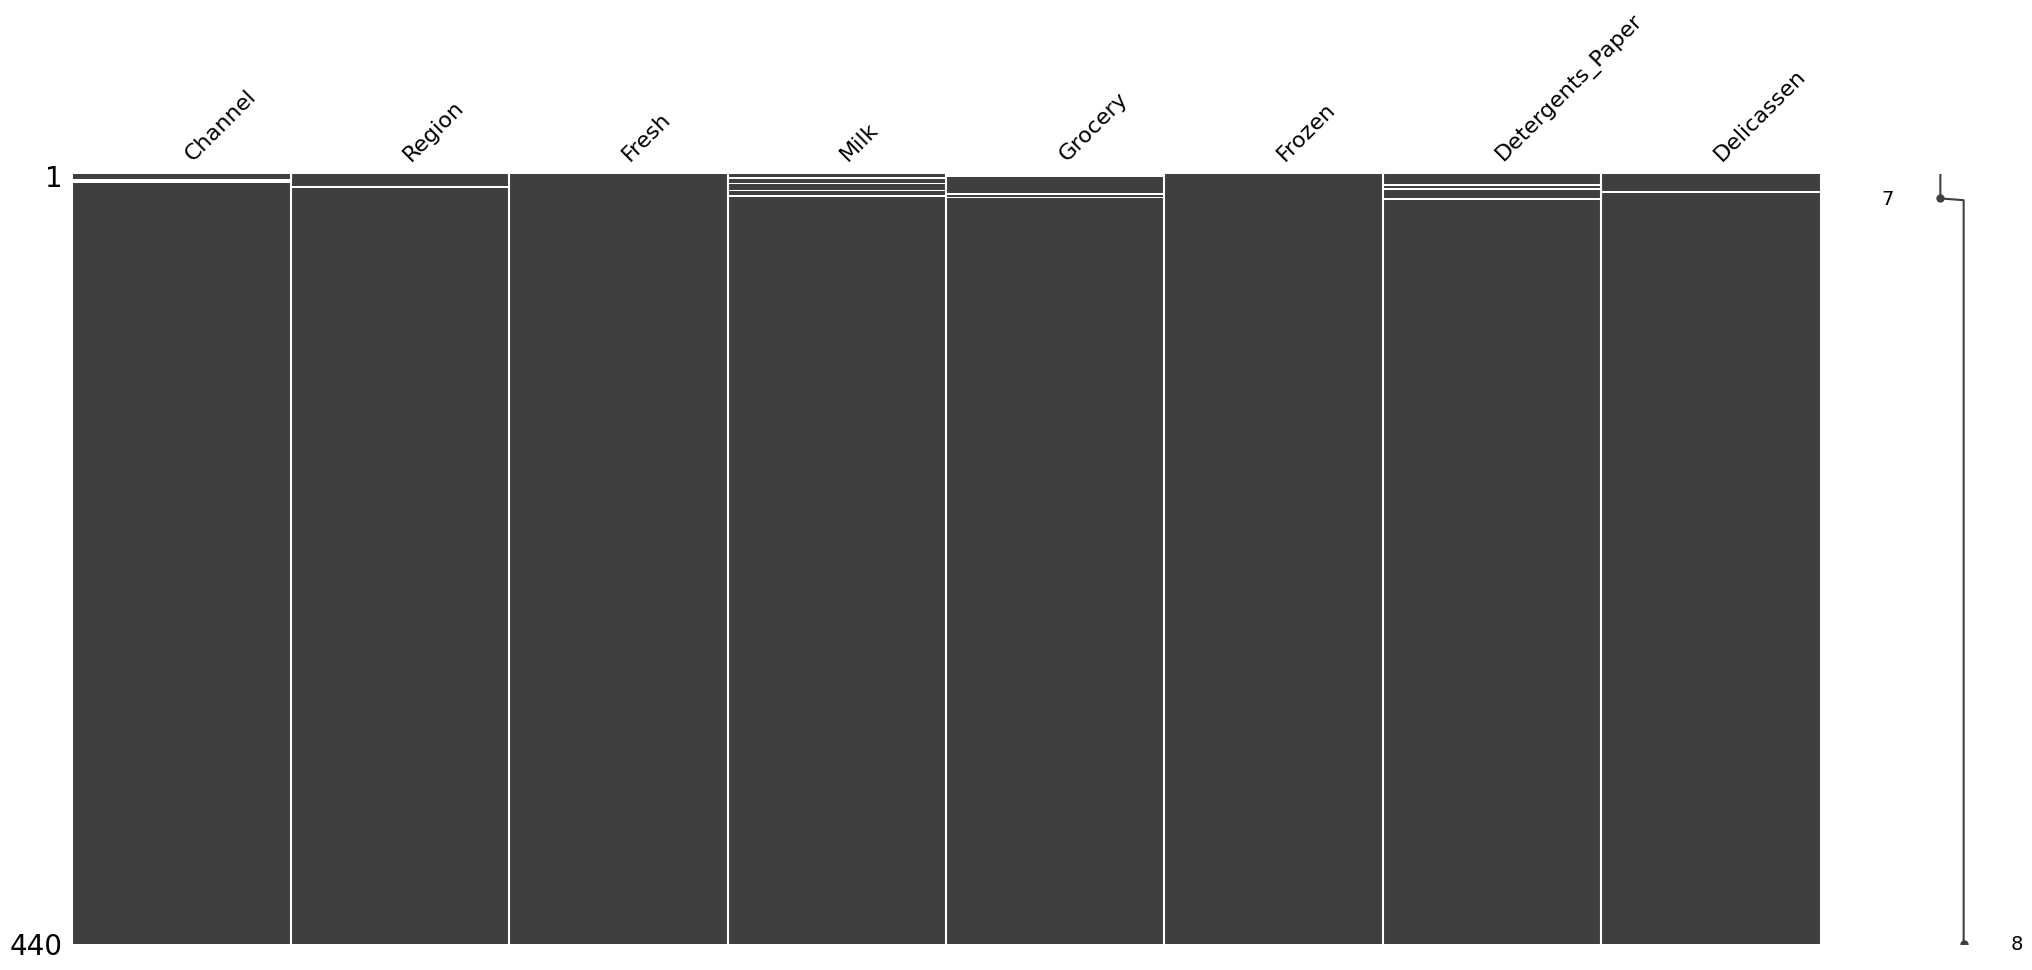

In [6]:
import missingno as msno
msno.matrix(df, sort='ascending')

**Step 3:** Prepare our data for our machine learning task

In [7]:
X = df.drop(columns = ['Fresh'])
y = df.Fresh

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

**Step 4:**  Setup the pipeline
1.   One-Hot encoders [documentation](https://contrib.scikit-learn.org/category_encoders/onehot.html)
2.   Mean imputation of missing values [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

Why not the [one-hot-encoder from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)?
1. The sklearn version does not allow you to select which columns to encode but encodes all columns.
2. The sklearn version returns a numpy array (matrix) rather than a pandas DataFrame. This means all column names and meta data is lost making life harder for debuging.

NOTE: That said, the category_encoder version does not have a parameter to specify a strategy for removing the unrequired. extra column (i.e. male, if we were encoding male and female) where as the sklearn library does. So depending on what you want this library may make sense. In general, however, I recommend sticking with the category_encoders version.


In [ ]:
# !pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.7 MB/s eta 0:00:00


In [8]:
from category_encoders.one_hot import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [9]:
X.dtypes

Channel              object
Region               object
Milk                float64
Grocery             float64
Frozen                int64
Detergents_Paper    float64
Delicassen          float64
dtype: object

In [10]:
ohe = OneHotEncoder( use_cat_names = True)
si = SimpleImputer(strategy = 'median')
lr = LinearRegression()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()


In [11]:
from sklearn.pipeline import Pipeline

In [12]:

new_predictor_lr =  Pipeline( steps = [ ('onehot',ohe), ('impuation', si), ('scaling', ss), ('model', lr) ])
new_predictor_dt =  Pipeline( steps = [ ('onehot',ohe), ('impuation', si), ('scaling', ss), ('model', dt) ])

In [13]:
new_predictor_lr.fit(X_train, y_train)
new_predictor_lr.score(X_test, y_test)

0.1423537032363148

In [14]:
new_predictor_dt.fit(X_train, y_train)
new_predictor_dt.score(X_test, y_test)

-0.2922804500442786

# What if something goes wrong in the pipeline?
I.e. there was an error in the pipeline during fit.

Manual check of the pipeline....

In [15]:
out = ohe.fit_transform(X_train)

In [16]:
out2 = si.fit_transform(out)

In [17]:
lr.fit(out2, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Task 1
This demo is on Moodle. You can click and open a "playground" copy in your browser.

Try and add:

1.  A baseline median predictor
2.  A random forest regressor
3.  Use median imputation, rather than a mean imputer for the best performing pipeline

In [20]:
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
baseline = Pipeline(steps=[
    ('onehot', ohe),
    ('imputation', SimpleImputer(strategy='median')),
    ('model', DummyRegressor(strategy='median'))
])

baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)


-0.13899726950797242

In [21]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(steps=[
    ('onehot', ohe),
    ('imputation', SimpleImputer(strategy='median')),
    ('model', rf)
])

rf_pipeline.fit(X_train, y_train)
rf_pipeline.score(X_test, y_test)


0.26679035103991755

In [22]:
SimpleImputer(strategy='median')

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [23]:
lr_pipeline = Pipeline(steps=[
    ('onehot', ohe),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler()),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
lr_pipeline.score(X_test, y_test)


0.1423537032363148

In [24]:
rf_pipeline.fit(X_train, y_train)
rf_pipeline.score(X_test, y_test)

0.26679035103991755

In [25]:
models = {
    "Baseline (Median)": baseline,
    "Linear Regression": lr_pipeline,
    "Decision Tree": new_predictor_dt,
    "Random Forest": rf_pipeline
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test):.3f}")


Baseline (Median): -0.139
Linear Regression: 0.142
Decision Tree: -0.307
Random Forest: 0.267
